# What Makes Successful Movies? EDA

## Attributions

"This product uses the TMDB API but is not endorsed or certified by TMDB."

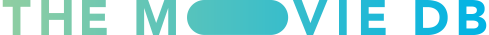

In [58]:
from IPython.core.display import SVG
SVG(filename='Data/tmdblogo-blue_long_2.svg')

## Import Packages

In [1]:
# Standard Imports
import numpy as np
import pandas as pd

# Additional Imports
# import json, time, os

## Load Data

In [2]:
# Load in the dataframe from first half of notebook 
final_tmdb_data_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
final_tmdb_data_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
# Verify file read correctly
final_tmdb_data_2000.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN


In [4]:
# Verify file read correctly
final_tmdb_data_2001.head(3)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.328,1200.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN


In [5]:
# Combine separate year files into one df for analysis
df = pd.concat([final_tmdb_data_2000, final_tmdb_data_2001], axis=0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,"{'id': 1131062, 'name': 'Wong Kar-Wai’s Love T...",150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.111,2248.0,PG


## EDA

In [14]:
# How many movies had at least some valid financial information? 
# (values > 0 for budget OR revenue)
# Exclude any movies with 0's for budget AND revenue

df_fin = df[(df['budget'] > 0) & (df['revenue'] > 0)]
df_fin.info()

# 356 entries have a value for both budget and revenue

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356 entries, 4 to 1288
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                356 non-null    object 
 1   adult                  356 non-null    float64
 2   backdrop_path          349 non-null    object 
 3   belongs_to_collection  89 non-null     object 
 4   budget                 356 non-null    float64
 5   genres                 356 non-null    object 
 6   homepage               51 non-null     object 
 7   id                     356 non-null    float64
 8   original_language      356 non-null    object 
 9   original_title         356 non-null    object 
 10  overview               356 non-null    object 
 11  popularity             356 non-null    float64
 12  poster_path            356 non-null    object 
 13  production_companies   356 non-null    object 
 14  production_countries   356 non-null    object 
 15  relea

In [15]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)?
df_fin['certification'].value_counts()

R        144
PG-13    117
PG        30
G         13
NR         7
Name: certification, dtype: int64

In [48]:
# What is the average revenue per certification category?
df_cert_rev = df.groupby("certification")["revenue"].mean()
print(f'Average revenue for each movie rating, grouped by {round(df_cert_rev,2)}')

Average revenue for each movie rating, grouped by certification
G          70418856.48
NC-17             0.00
NR          2295879.77
PG         62480125.85
PG-13      71465436.49
R          16259918.07
Unrated           0.00
Name: revenue, dtype: float64


In [47]:
# What is the average budget per certification category?
df_cert_bud = df.groupby("certification")["budget"].mean()
print(f'Average budget for each movie rating, grouped by {round(df_cert_bud,2)}')

Average budget for each movie rating, grouped by certification
G          22880000.00
NC-17             0.00
NR          1509015.41
PG         25306407.00
PG-13      30945922.68
R           9684129.72
Unrated           0.00
Name: budget, dtype: float64


## Deliverable

In [51]:
# Save a final merged .csv.gz of all of the tmdb api data
# as "tmdb_results_combined.csv.gz"
df.to_csv("Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)